In [3]:
import urllib
from IPython.display import Image, display, clear_output
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')

In [4]:
import os
import h5py
import numpy as np
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History

C:\Users\hi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
def load_vgg16(weights_path='C:/Users/hi/CarDent/car-damage-detective-master/vgg16.h5'):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(img_width, img_height,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
      
    # assert os.path.exists(weights_path), 'Model weights not found (see "weights_path")'
    
    if weights_path:
    # note: this chops off the last layers of VGG16 

    # loads the weights of the VGG16 networks
    # note: when there is a complete match between model definition
    # and your weights savefile, you can simply call model.load_weights(filename)
        f = h5py.File(weights_path)
        for k in range(f.attrs['nb_layers']):
            if k >= len(model.layers): 
                # we don't look at the last (fully-connected) layers in the savefile
                break
            g = f['layer_{}'.format(k)]
            weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
            model.layers[k].set_weights(weights)
        f.close()
        print('VGG16 Model with partial weights loaded.')
    else:
        print('VGG16 Model with no weights Loaded.')

    return model

In [40]:
def VGG_16(weights_path='C:/Users/hi/CarDent/car-damage-detective-master/vgg16.h5'):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(img_width, img_height,3)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    

   

    return model

In [6]:
# path to the model weights file
location = 'C:/Users/hi/POC'
top_model_weights_path=location+'/top_model_weights.h5' # will be saved into when we create our model
# model_path = location + '/initial_data2_model.h5'
fine_tuned_model_path = location+'/ft_model.h5'

# dimensions of our images
img_width, img_height = 256,256

train_data_dir = 'D:/DS/Train_Images'
validation_data_dir = 'D:/DS/Val_Images'

train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
nb_train_samples = sum(train_samples)
validation_samples = [len(os.listdir(validation_data_dir+'/'+i)) for i in sorted(os.listdir(validation_data_dir))]
nb_validation_samples = sum(validation_samples)

size_batch=5
nb_epoch = 5

In [20]:
from keras import applications
model1 = applications.VGG16(include_top=False, weights='imagenet', input_shape=(img_width,img_height,3))

58892288/58889256 [==============================] - 62s 1us/step


In [35]:
def save_bottleneck_features(location):
    datagen = ImageDataGenerator(rescale=1./255)  
    
   
    
    generator = datagen.flow_from_directory(train_data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=size_batch, 
                                            class_mode=None, 
                                            shuffle=False) 
    
    bottleneck_features_train = model1.predict_generator(generator, nb_train_samples//size_batch)
    np.save(open(location+'/bottleneck_features_train2', 'wb'), bottleneck_features_train)
    
    # repeat with the validation data
    generator = datagen.flow_from_directory(validation_data_dir,
                                           target_size=(img_width, img_height),
                                           batch_size=3,
                                           class_mode=None,
                                           shuffle=False)
    bottleneck_features_validation = model1.predict_generator(generator, nb_validation_samples//size_batch)
    np.save(open(location+'/bottleneck_features_validation2', 'wb'), bottleneck_features_validation)

In [36]:
save_bottleneck_features(location)

Found 314 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [41]:
np.save(open(location+'/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

NameError: name 'bottleneck_features_train' is not defined

In [8]:
def plot_metrics(hist, stop=50):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
                            
    axes = axes.flatten()

    axes[0].plot(range(stop), hist['acc'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist['val_acc'], label='Validation', color='#03507E')
    axes[0].set_title('Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
                             
    axes[1].plot(range(stop), hist['loss'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist['val_loss'], label='Validation', color='#03507E')
    axes[1].set_title('Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper right')
                             
    plt.tight_layout();
    
    print ("Best Model:" )
    print_best_model_results(hist)

In [7]:
train_data = np.load('C:/Users/hi/POC/bottleneck_features_train2')
validation_data = np.load(open(location+'/bottleneck_features_validation2',"rb"))
train_labels = np.array([0] * train_samples[0] + 
                            [1] * train_samples[1])

In [8]:
validation_labels = np.array([0] * validation_samples[0] + 
                                 [1] * validation_samples[1])
validation_labels
train_data.shape
train_labels.shape

(307,)

In [61]:
validation_data.shape

(3, 8, 8, 512)

In [12]:
def train_binary_model():

    train_data = np.load(open('C:/Users/hi/POC/bottleneck_features_train1.npy',"rb"))
    train_labels = np.array([0] * train_samples[0] + 
                            [1] * 217)

    validation_data = np.load(open(location+'/bottleneck_features_validation1.npy',"rb"))
    validation_labels = np.array([0] * 2 + 
                                 [1] * 1)
    model1 = Sequential()
    model1.add(Flatten(input_shape=train_data.shape[1:])) # 512, 4, 4
    model1.add(Dense(256, activation = 'relu'))
    model1.add(Dropout(0.5)) 
    model1.add(Dense(1, activation = 'sigmoid'))
     

    model1.compile(optimizers.SGD(lr=0.0001, momentum=0.9),
              loss='binary_crossentropy', metrics=['accuracy'])

    
    checkpoint = ModelCheckpoint(top_model_weights_path, monitor='val_acc',verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

    fit = model1.fit(train_data, train_labels,
              nb_epoch=nb_epoch, batch_size=16,
              validation_data=(validation_data, validation_labels),callbacks=[checkpoint])
    
    
    
    return model1, fit.history

In [10]:
model1.summary()

NameError: name 'model1' is not defined

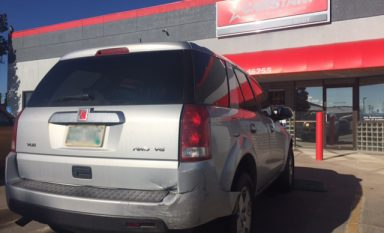

In [13]:
d1a_model2, d1a_history2 = train_binary_model()

C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 310 samples, validate on 3 samples
Epoch 1/5
310/310 [==============================] - 4s 12ms/step - loss: 0.5917 - acc: 0.6806 - val_loss: 1.2964 - val_acc: 0.3333

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to C:/Users/hi/POC/top_model_weights.h5
Epoch 2/5
310/310 [==============================] - 3s 9ms/step - loss: 0.3568 - acc: 0.8484 - val_loss: 1.4889 - val_acc: 0.3333

Epoch 00002: val_acc did not improve from 0.33333
Epoch 3/5
310/310 [==============================] - 3s 10ms/step - loss: 0.2343 - acc: 0.9065 - val_loss: 2.0622 - val_acc: 0.3333

Epoch 00003: val_acc did not improve from 0.33333
Epoch 4/5
310/310 [==============================] - 3s 10ms/step - loss: 0.2041 - acc: 0.9484 - val_loss: 2.7466 - val_acc: 0.3333

Epoch 00004: val_acc did not improve from 0.33333
Epoch 5/5
310/310 [==============================] - 3s 10ms/step - loss: 0.1609 - acc: 0.9645 - val_loss: 2.6646 - val_acc: 0.3333

Epoch 00005: val_acc did not improve 

In [83]:
import urllib.request
def car_categories_gate(image_path, model):
    urllib.request.urlretrieve(image_path, 'save.jpg') # or other way to upload image
    img = load_img('save.jpg', target_size=(256, 256)) # this is a PIL image 
    x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
    x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
    pred = model.predict(x)
    print ("Validating that damage exists...")
    print (pred)
    if pred[0][0] <=.5:

        print ("Validation complete - proceed to location and severity determination")
    else:
        print ("Are you sure that your car is damaged? Please submit another picture of the damage.")
        print ("Hint: Try zooming in/out, using a different angle or different lighting")

In [110]:
model1=load_model(location+'/d1a_model2.h5')

OSError: Unable to open file (unable to open file: name = 'C:/Users/hi/POC/d1a_model2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:

urllib.request.urlretrieve('https://www.nerdwallet.com/blog/wp-content/uploads/2015/12/exterior-car-damage-384x233.jpg', 'save.jpg')
img = load_img('save.jpg', target_size=(256, 256))
x = img_to_array(img) # this is a Numpy array with shape (3, 256, 256)
print(x.shape)
x = x.reshape((1,) + x.shape)/255 # this is a Numpy array with shape (1, 3, 256, 256)
print(x.shape)
pred = d1a_model2.predict(x)
print ("Validating that damage exists...")
print (pred.shape)
if pred[0][0] <=.5:
    print ("Validation complete - proceed to location and severity determination")
else:
    print ("Are you sure that your car is damaged? Please submit another picture of the damage.")
    print ("Hint: Try zooming in/out, using a different angle or different lighting")


(256, 256, 3)
(1, 256, 256, 3)


ValueError: Error when checking input: expected flatten_2_input to have shape (8, 8, 512) but got array with shape (256, 256, 3)

In [93]:
pred[0][0][0][0]

IndexError: index 1 is out of bounds for axis 0 with size 1

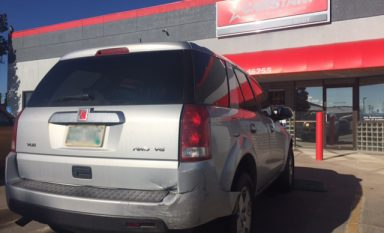

In [75]:
Image('https://www.nerdwallet.com/blog/wp-content/uploads/2015/12/exterior-car-damage-384x233.jpg')

In [84]:
car_categories_gate('https://www.nerdwallet.com/blog/wp-content/uploads/2015/12/exterior-car-damage-384x233.jpg', model1)

Validating that damage exists...
[[[[0.         0.         0.         ... 0.         0.4850084
    0.        ]
   [0.         0.         0.         ... 0.         0.8373866
    0.        ]
   [0.00419497 0.         0.         ... 0.         1.0964662
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.09520984
    0.        ]
   [0.77988714 0.         0.         ... 0.         0.14615673
    0.        ]
   [0.60939777 0.         0.         ... 0.         0.6595774
    0.        ]]

  [[0.         0.         0.         ... 0.         0.07181817
    0.        ]
   [0.29819697 0.         0.         ... 0.         0.6243127
    0.        ]
   [1.0997593  0.         0.         ... 0.2447581  0.97284496
    0.        ]
   ...
   [0.0876309  0.         0.         ... 0.         0.47409868
    0.        ]
   [0.28085896 0.         0.         ... 0.         0.683477
    0.        ]
   [0.16159785 0.         0.         ... 0.         0.83629465
    0.        ]]

  [[0.19

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
 def finetune_binary_model():
    model = load_vgg16()

    # build a classifier model to put on top of the convolutional model
    top_model = Sequential()
    top_model.add(Flatten(input_shape=model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu', W_regularizer=l2(0.01)))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(1, activation='sigmoid'))

    top_model.load_weights(top_model_weights_path) # load weights_path

    # add the model on top of the convolutional base
    model.add(top_model)
    
    # set the first 25 layers (up to the last conv block)
    # to non-trainable - weights will not be updated
    for layer in model.layers[:25]:
        layer.trainable=False

    # compile the model with a SGD/momentum optimizer 
    # and a very slow learning rate
    model.compile(loss='binary_crossentropy',
                 optimizer = optimizers.SGD(lr=0.00001, momentum=0.9), # reduced learning rate by 1/10
                  metrics=['accuracy'])
    
    # prepare data augmentation configuration
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator= train_datagen.flow_from_directory(train_data_dir,
                                                     target_size=(img_height, img_width),
                                                     batch_size=8,
                                                     class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                           target_size=(img_height, img_width),
                                                           batch_size=8,
                                                           class_mode='binary')
    
    
    checkpoint = ModelCheckpoint(fine_tuned_model_path, monitor='val_acc', 
                                 verbose=1, save_best_only=True, 
                                 save_weights_only=False, mode='auto')
    # fine-tune the model
    fit = model.fit_generator(train_generator,
                              samples_per_epoch=nb_train_samples,
                              nb_epoch=nb_epoch,
                              validation_data=validation_generator,
                              nb_val_samples=nb_validation_samples,
                              verbose=1,
                              callbacks=[checkpoint])
    
    with open(location+'/ft_history.txt', 'wb') as f:
        json.dump(fit.history, f)
    
    return model, fit.history

#### Input 

In [8]:
# path to the model weights file
location = 'C:/Users/hi/POC'
top_model_weights_path=location+'/top_model_weights.h5' # will be saved into when we create our model
# model_path = location + '/initial_data2_model.h5'
fine_tuned_model_path = location+'/ft_model.h5'

# dimensions of our images
img_width, img_height = 256, 256

train_data_dir = 'D:/DS/Train_Images'
validation_data_dir = 'D:/DS/Val_Images'

train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
nb_train_samples = sum(train_samples)
validation_samples = [len(os.listdir(validation_data_dir+'/'+i)) for i in sorted(os.listdir(validation_data_dir))]
nb_validation_samples = sum(validation_samples)

nb_epoch = 5

In [10]:
def evaluate_binary_model(model, directory, labels):
    datagen = ImageDataGenerator(rescale=1./255)  

    generator = datagen.flow_from_directory(directory,
                                target_size=(img_height, img_width),
                                batch_size=8,
                                class_mode='binary', # categorical for multiclass
                                shuffle=False)
    
    predictions = model.predict_generator(generator, len(labels))
    
    # use for multiclass
    # pred_labels = np.argmax(predictions, axis=1)
    
    pred_labels = [0 if i <0.5 else 1 for i in predictions]

   
    print (classification_report(validation_labels, pred_labels))
    
    cm = confusion_matrix(validation_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='g');

In [20]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest') # omitted rescaling to keep the images displayable

img = load_img('C:\\Users\\hi\\Desktop\\CarImages3.JPG') # this is a PIL image 
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the 'preview/' directory
os.makedirs('C:\\Users\\hi\\Desktop\\Images1')
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='Images1', save_prefix='damage_car',
                         save_format='jpeg'):
    i +=1
    if i > 5:
        break # otherwise the generator would loop indefinitely





FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\hi\\Desktop\\Images1'

In [26]:
# path to the model weights file
location = 'D:/DS'
#top_model_weights_path=location+'/top_model_weights.h5' # will be saved into when we create our model
# model_path = location + '/initial_data2_model.h5'
#fine_tuned_model_path = location+'/ft_model.h5'

# dimensions of our images
img_width, img_height = 256, 256

train_data_dir = location+'/POC_Images'
validation_data_dir = location+'/Val_Images'



In [31]:
os.listdir(train_data_dir)



'D:/DS/POC_Images'

In [37]:
train_samples
    
    

[100, 214]

In [36]:
train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]